In [81]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr

In [82]:
import matplotlib.pyplot as plt
import time
from datetime import date, datetime,timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [83]:
# List of beauty brands and their tickers
beauty_brands = {
    'EL': 'Estee Lauder',
    'ULTA': 'Ulta Beauty',
    'LRLCY': 'Loreal',
    'COTY': 'Coty Inc.',
    'ELF': 'e.l.f. Beauty',
    'IPAR': 'Inter Parfums'
}


In [84]:
end_date = datetime.now()
end_date

startdate = end_date - timedelta(days=10*365)

In [85]:
stock_data = yf.download(list(beauty_brands.keys()),start=startdate, end = end_date)

[*********************100%%**********************]  6 of 6 completed


In [86]:
stock_data.head()

Price       Adj Close                                                  \
Ticker           COTY         EL ELF       IPAR      LRLCY       ULTA   
Date                                                                    
2014-08-15  15.196110  67.797646 NaN  23.221300  28.553776  93.239998   
2014-08-18  15.255701  68.358452 NaN  23.818014  28.682161  94.529999   
2014-08-19  15.332320  68.224922 NaN  23.986107  28.588011  95.639999   
2014-08-20  15.289756  68.171516 NaN  24.078547  28.348349  97.489998   
2014-08-21  15.400422  67.895531 NaN  24.372704  28.493864  96.000000   

Price           Close                            ... Open             \
Ticker           COTY         EL ELF       IPAR  ...  ELF       IPAR   
Date                                             ...                   
2014-08-15  17.850000  76.160004 NaN  27.629999  ...  NaN  28.040001   
2014-08-18  17.920000  76.790001 NaN  28.340000  ...  NaN  27.770000   
2014-08-19  18.010000  76.639999 NaN  28.540001  ...  NaN  28.299999   
2014-08-20  17.959999  76.580002 NaN  28.650000  ...  NaN  28.420000   
2014-08-21  18.090000  76.269997 NaN  29.000000  ...  NaN  28.670000   

Price                             Volume                                      
Ticker          LRLCY       ULTA    COTY       EL ELF    IPAR  LRLCY    ULTA  
Date                                                                          
2014-08-15  33.830002  94.370003  377800  3086000 NaN   77600  28100  611000  
2014-08-18  33.360001  93.339996  399800  2042800 NaN  114700  32000  441800  
2014-08-19  33.330002  94.849998  423800  1700100 NaN   73100  25900  426500  
2014-08-20  33.000000  96.010002  350800  1250900 NaN   63500  19300  938700  
2014-08-21  33.220001  97.070000  604000  1725100 NaN   60900  36400  508900  

[5 rows x 36 columns]

In [87]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2014-08-15 to 2024-08-09
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, COTY)   2513 non-null   float64
 1   (Adj Close, EL)     2513 non-null   float64
 2   (Adj Close, ELF)    1983 non-null   float64
 3   (Adj Close, IPAR)   2513 non-null   float64
 4   (Adj Close, LRLCY)  2513 non-null   float64
 5   (Adj Close, ULTA)   2513 non-null   float64
 6   (Close, COTY)       2513 non-null   float64
 7   (Close, EL)         2513 non-null   float64
 8   (Close, ELF)        1983 non-null   float64
 9   (Close, IPAR)       2513 non-null   float64
 10  (Close, LRLCY)      2513 non-null   float64
 11  (Close, ULTA)       2513 non-null   float64
 12  (High, COTY)        2513 non-null   float64
 13  (High, EL)          2513 non-null   float64
 14  (High, ELF)         1983 non-null   float64
 15  (High, IPAR)        2513 non-null   f

In [88]:
stock_data.isnull().sum()

Price      Ticker
Adj Close  COTY        0
           EL          0
           ELF       530
           IPAR        0
           LRLCY       0
           ULTA        0
Close      COTY        0
           EL          0
           ELF       530
           IPAR        0
           LRLCY       0
           ULTA        0
High       COTY        0
           EL          0
           ELF       530
           IPAR        0
           LRLCY       0
           ULTA        0
Low        COTY        0
           EL          0
           ELF       530
           IPAR        0
           LRLCY       0
           ULTA        0
Open       COTY        0
           EL          0
           ELF       530
           IPAR        0
           LRLCY       0
           ULTA        0
Volume     COTY        0
           EL          0
           ELF       530
           IPAR        0
           LRLCY       0
           ULTA        0
dtype: int64

In [89]:
stock_data['Year']= stock_data.index.year
stock_data['Month'] = stock_data.index.month
stock_data['Weekday'] = stock_data.index.weekday
stock_data['Date'] = stock_data.index.date

In [90]:
stock_data.columns

MultiIndex([('Adj Close',  'COTY'),
            ('Adj Close',    'EL'),
            ('Adj Close',   'ELF'),
            ('Adj Close',  'IPAR'),
            ('Adj Close', 'LRLCY'),
            ('Adj Close',  'ULTA'),
            (    'Close',  'COTY'),
            (    'Close',    'EL'),
            (    'Close',   'ELF'),
            (    'Close',  'IPAR'),
            (    'Close', 'LRLCY'),
            (    'Close',  'ULTA'),
            (     'High',  'COTY'),
            (     'High',    'EL'),
            (     'High',   'ELF'),
            (     'High',  'IPAR'),
            (     'High', 'LRLCY'),
            (     'High',  'ULTA'),
            (      'Low',  'COTY'),
            (      'Low',    'EL'),
            (      'Low',   'ELF'),
            (      'Low',  'IPAR'),
            (      'Low', 'LRLCY'),
            (      'Low',  'ULTA'),
            (     'Open',  'COTY'),
            (     'Open',    'EL'),
            (     'Open',   'ELF'),
            (     'Open',  '

In [91]:
stock_data.dropna(inplace=True)

In [92]:
stock_data.columns

MultiIndex([('Adj Close',  'COTY'),
            ('Adj Close',    'EL'),
            ('Adj Close',   'ELF'),
            ('Adj Close',  'IPAR'),
            ('Adj Close', 'LRLCY'),
            ('Adj Close',  'ULTA'),
            (    'Close',  'COTY'),
            (    'Close',    'EL'),
            (    'Close',   'ELF'),
            (    'Close',  'IPAR'),
            (    'Close', 'LRLCY'),
            (    'Close',  'ULTA'),
            (     'High',  'COTY'),
            (     'High',    'EL'),
            (     'High',   'ELF'),
            (     'High',  'IPAR'),
            (     'High', 'LRLCY'),
            (     'High',  'ULTA'),
            (      'Low',  'COTY'),
            (      'Low',    'EL'),
            (      'Low',   'ELF'),
            (      'Low',  'IPAR'),
            (      'Low', 'LRLCY'),
            (      'Low',  'ULTA'),
            (     'Open',  'COTY'),
            (     'Open',    'EL'),
            (     'Open',   'ELF'),
            (     'Open',  '

In [93]:
tickers = ['ELF', 'EL', 'COTY']
data = {ticker: stock_data.xs(ticker, level='Ticker', axis=1) for ticker in tickers}

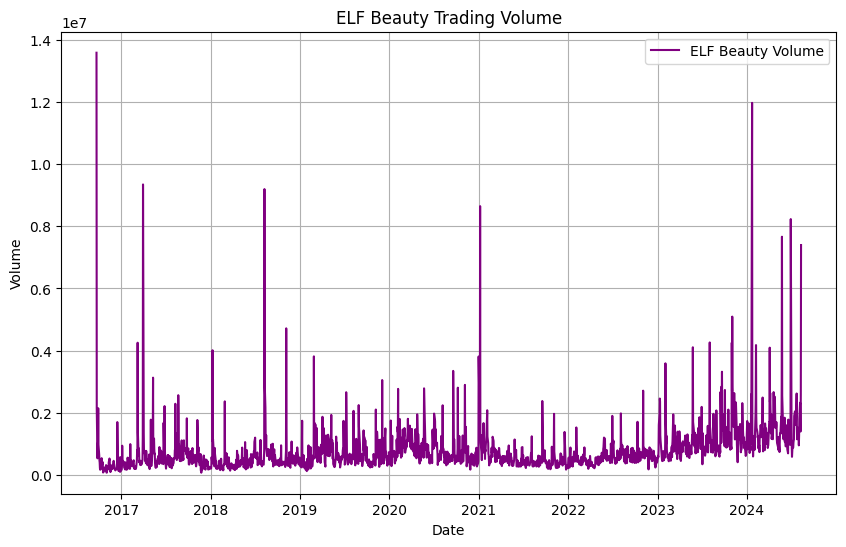

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(data['ELF'].index, data['ELF']['Volume'], label='ELF Beauty Volume', color='purple')
plt.title('ELF Beauty Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [95]:

adj_close_data = stock_data['Adj Close']


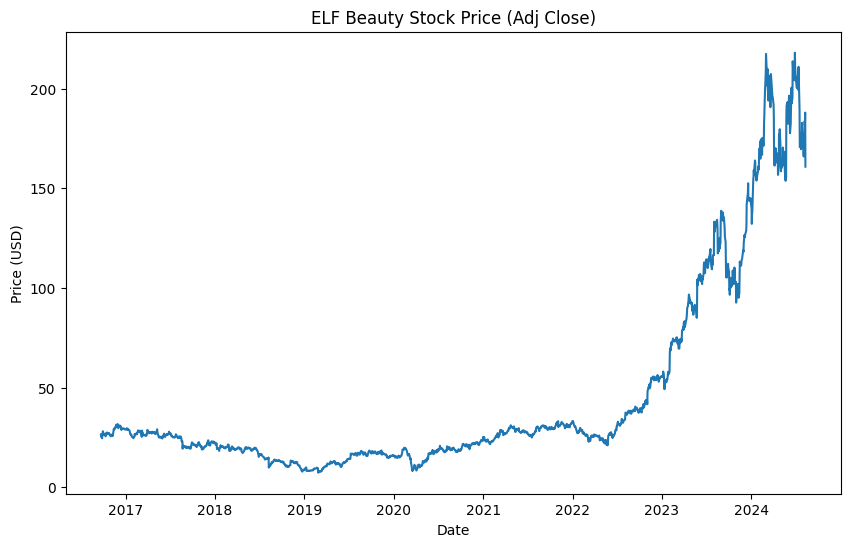

In [96]:

elf_data = adj_close_data['ELF']

plt.figure(figsize=(10, 6))
plt.plot(elf_data)
plt.title('ELF Beauty Stock Price (Adj Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


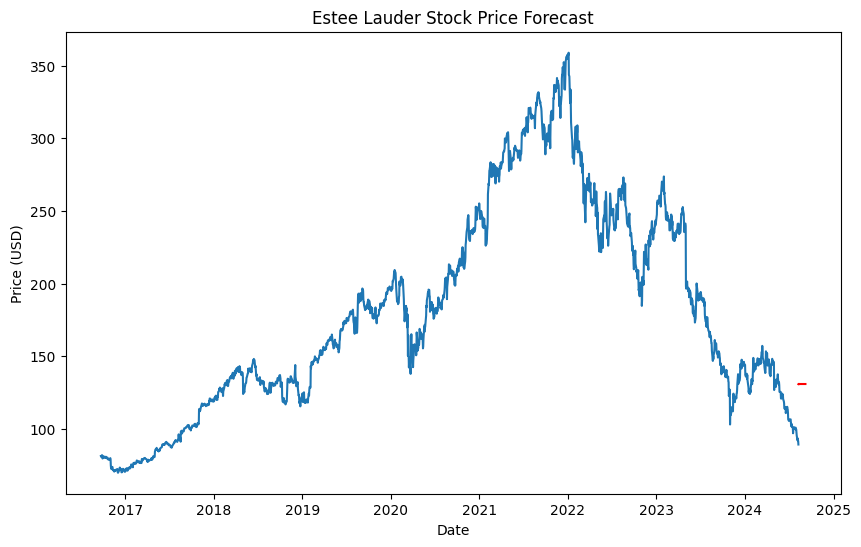

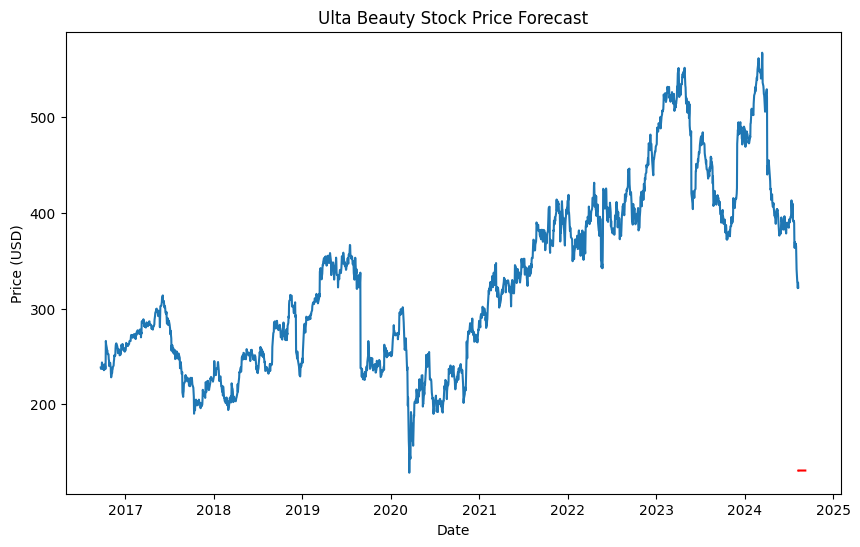

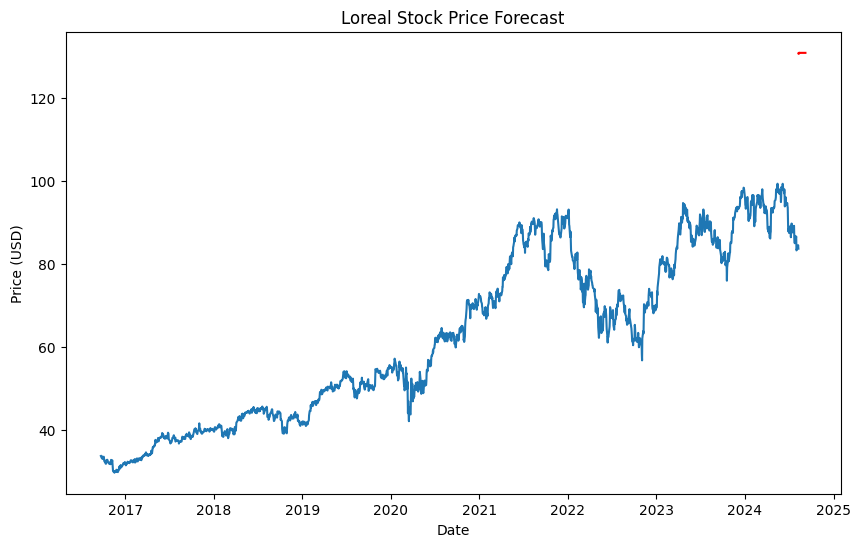

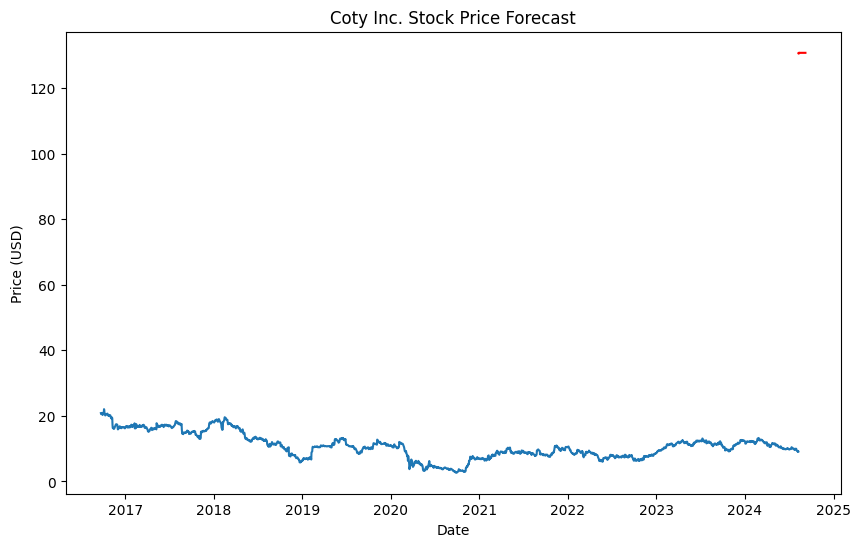

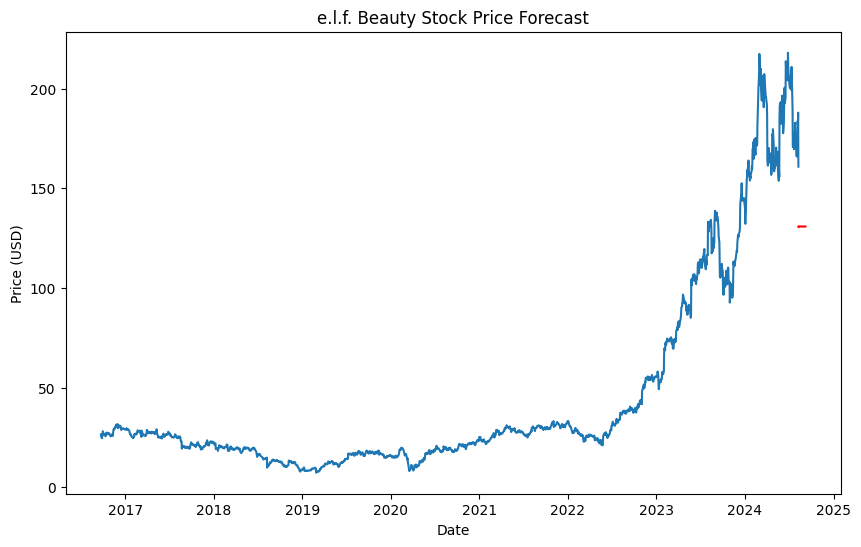

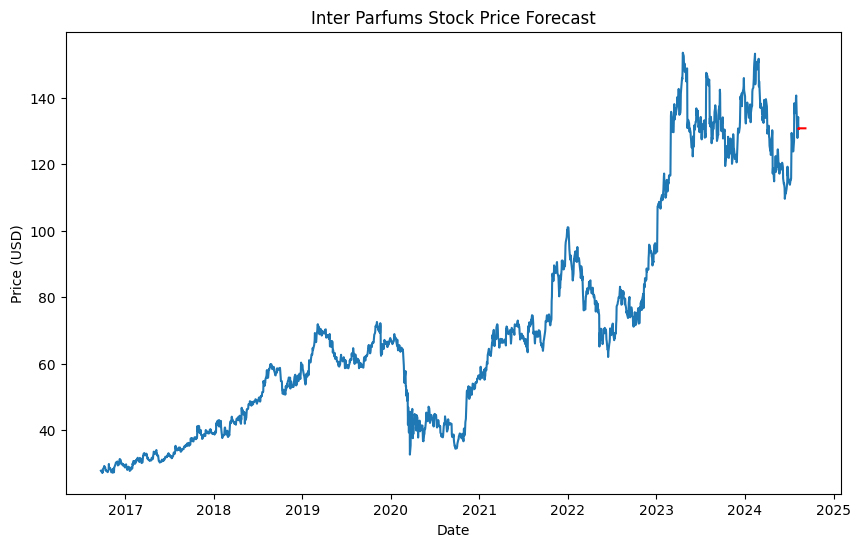

In [101]:
forecasts={}
for ticker in beauty_brands.keys():
   ticker_data = adj_close_data[ticker]
   model = ARIMA(ticker_data, order=(5,1,0))
   arima_result = model.fit()

   forecasts[ticker] = forecast

   plt.figure(figsize=(10, 6))
   plt.plot(ticker_data.index, ticker_data, label=f'{ticker} Actual')
   plt.plot(pd.date_range(ticker_data.index[-1], periods=30, freq='D'), forecast, label=f'{ticker} Forecast', color='red')
   plt.title(f'{beauty_brands[ticker]} Stock Price Forecast')
   plt.xlabel('Date')
   plt.ylabel('Price (USD)')

